In [2]:
import numpy as np
import pandas as pd 
from scipy.stats import ttest_1samp


Type I errors

In [3]:
# Generate a synthetic dataset using numpy
np.random.seed(42)  # For reproducibility
sample_size = 30
population_mean = 50  # Assumed true population mean
population_std = 10  # Assumed true population standard deviation

# Generate random sample data
sample_data = np.random.normal(loc=population_mean, scale=population_std, size=sample_size)

# Perform a one-sample t-test (null hypothesis: mean = population mean)
t_stat, p_value = ttest_1samp(sample_data, population_mean)

# Print test results
print("Assumed Population Mean:", round(population_mean, 4))
print("Assumed Population Std Dev:", round(population_std, 4))
print("Sample Mean:", round(np.mean(sample_data), 4))
print("T-test Statistic:", round(t_stat, 4))
print("P-value:", round(p_value, 4))

# Simulating Type I error (false positive)
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Type I Error: We rejected the null hypothesis when it was actually true.")
else:
    print("No Type I Error: We failed to reject the null hypothesis.")


Assumed Population Mean: 50
Assumed Population Std Dev: 10
Sample Mean: 48.1185
T-test Statistic: -1.145
P-value: 0.2616
No Type I Error: We failed to reject the null hypothesis.


Graphical representation of type I error

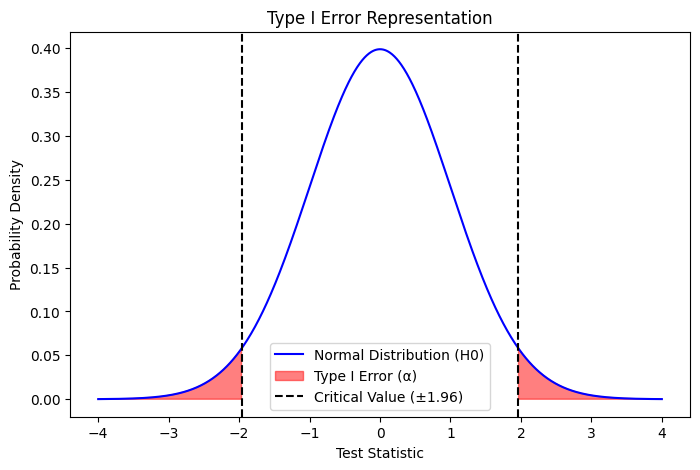

In [12]:
import matplotlib.pyplot as plt
from scipy.stats import norm
# Generate a normal distribution for H0
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, loc=0, scale=1)

plt.figure(figsize=(8, 5))
plt.plot(x, y, label="Normal Distribution (H0)", color="blue")
plt.fill_between(x, y, where=(x < -1.96) | (x > 1.96), color='red', alpha=0.5, label="Type I Error (α)")
plt.axvline(1.96, color='black', linestyle='dashed', label="Critical Value (±1.96)")
plt.axvline(-1.96, color='black', linestyle='dashed')
plt.title("Type I Error Representation")
plt.xlabel("Test Statistic")
plt.ylabel("Probability Density")
plt.legend()
plt.show()


Type II errors 

In [6]:
# Generate a synthetic dataset using numpy
np.random.seed(42)  # For reproducibility
sample_size = 30
population_mean = 50  # Assumed true population mean
population_std = 10  # Assumed true population standard deviation

# Generate random sample data
sample_data = np.random.normal(loc=population_mean, scale=population_std, size=sample_size)

# Perform a one-sample t-test (null hypothesis: mean = population mean)
t_stat, p_value = ttest_1samp(sample_data, population_mean)

# Print test results
print("Assumed Population Mean:", round(population_mean, 4))
print("Assumed Population Std Dev:", round(population_std, 4))
print("Sample Mean:", round(np.mean(sample_data), 4))
print("T-test Statistic:", round(t_stat, 4))
print("P-value:", round(p_value, 4))

# Simulating Type II error (false negative)
alpha = 0.05  # Significance level
true_mean = 53  # Actual mean different from null hypothesis

# Perform t-test assuming true mean
new_t_stat, new_p_value = ttest_1samp(sample_data, true_mean)

if new_p_value > alpha:
    print("Type II Error: We failed to reject the null hypothesis when it was actually false.")
else:
    print("No Type II Error: We correctly rejected the null hypothesis.")


Assumed Population Mean: 50
Assumed Population Std Dev: 10
Sample Mean: 48.1185
T-test Statistic: -1.145
P-value: 0.2616
No Type II Error: We correctly rejected the null hypothesis.


A graphical representatoin of type II errors

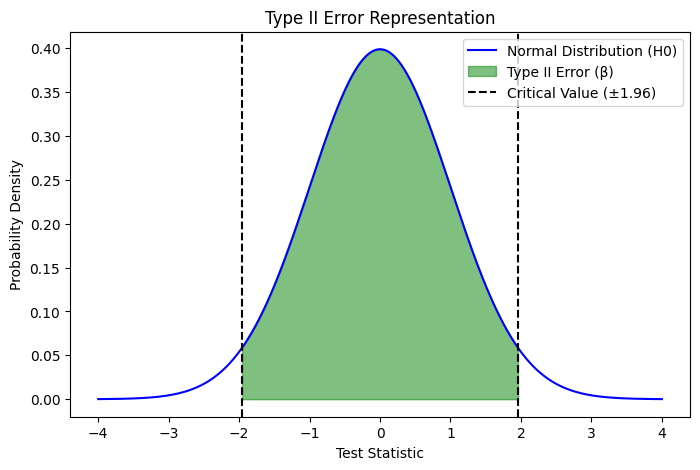

In [13]:
# Generate a normal distribution for H0
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, loc=0, scale=1)

plt.figure(figsize=(8, 5))
plt.plot(x, y, label="Normal Distribution (H0)", color="blue")
plt.fill_between(x, y, where=(x > -1.96) & (x < 1.96), color='green', alpha=0.5, label="Type II Error (β)")
plt.axvline(1.96, color='black', linestyle='dashed', label="Critical Value (±1.96)")
plt.axvline(-1.96, color='black', linestyle='dashed')
plt.title("Type II Error Representation")
plt.xlabel("Test Statistic")
plt.ylabel("Probability Density")
plt.legend()
plt.show()